In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle   
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot: xlabel='quality', ylabel='count'>

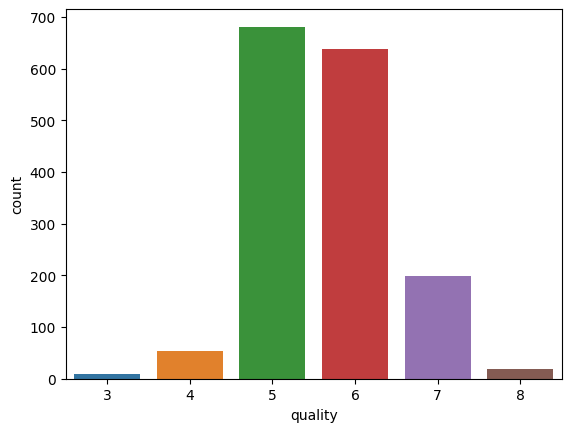

In [6]:
# quality distribution
sns.countplot(x='quality',data=df)


In [7]:
# if >5 then 1 else 0
df["quality"]=[1 if x>5 else 0 for x in df.quality]

In [8]:
x=df.drop(["quality"],axis=1)
y=df.quality

In [9]:
y.unique()

array([0, 1], dtype=int64)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
sc=StandardScaler()

In [12]:
# fit_transform for train data
x_train=sc.fit_transform(x_train)

In [13]:
m1=SVC()

In [14]:
m1.fit(x_train,y_train)

SVC()

In [15]:
y_pred=m1.predict(x_test)

e:\DeepLearning\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [16]:
m1.score(x_test,y_pred)

e:\DeepLearning\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


1.0

In [17]:
def get_models():
    models = {}
    models['Logistic Regression'] = LogisticRegression(random_state=42)
    models['Random Forest'] = RandomForestClassifier()
    models['SVM'] = SVC()
    return models


In [18]:
def train_model(models, x_train, y_train):
    # Train the models and store in a dictionary
    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[name] = model
    return trained_models

In [19]:
# get all models accuracy
def get_accuracy(models, x_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} : {round(accuracy*100, 2)}%')


In [20]:
models = get_models()

In [21]:
trained_model=train_model(models, x_train, y_train)

In [22]:
x_test=sc.transform(x_test)

In [23]:
accuracy = get_accuracy(trained_model, x_test, y_test)

Logistic Regression : 74.06%
Random Forest : 79.38%
SVM : 77.19%


In [24]:
# get evaluation metrics of each model
# import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
def get_metrics(models, x_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(x_test)
        print(f'{name} :')
        print(classification_report(y_test, y_pred))
        print('')

In [25]:
metrics = get_metrics(trained_model, x_test, y_test)

Logistic Regression :
              precision    recall  f1-score   support

           0       0.69      0.74      0.72       141
           1       0.79      0.74      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320


Random Forest :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       141
           1       0.82      0.82      0.82       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320


SVM :
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       141
           1       0.81      0.77      0.79       179

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77     

In [26]:
y_pred = trained_model['Logistic Regression'].predict(x_test)

In [27]:
y_pred[0]

0

In [28]:
x_test[0]

array([-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, -3.86510130e-02,
        5.18158057e-01, -1.81975648e-01, -1.99566462e-02,  1.75731759e-01,
       -4.65392578e-01, -1.34389336e-04, -7.77452782e-01])

In [29]:
x1=[[8.4,0.78,0.01,1.8,0.078,12.0,39.0,0.9978,4.51,0.86,10.4]]

In [30]:
x1=sc.transform(x1)

e:\DeepLearning\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
trained_model['Logistic Regression'].predict(x1)

array([0], dtype=int64)

In [32]:
x2=[[11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8]]

In [33]:
sc.transform(x2)

e:\DeepLearning\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.66881035, -1.39816873,  1.47170655, -0.45670298, -0.27270642,
         0.10901854,  0.40519946,  0.66085053, -0.9850234 , -0.45849162,
        -0.58738978]])

In [34]:
x3=[[9.6,0.32,0.47,1.4,0.055999999999999994,9.0,24.0,0.99695,3.22,0.82,10.3]]

In [35]:
sc.transform(x3)

e:\DeepLearning\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.74050397, -1.17496085,  1.01104539, -0.80507963, -0.65799937,
        -0.66696597, -0.6880591 ,  0.09487863, -0.59530028,  0.91658007,
        -0.11223228]])

In [36]:
trained_model['Random Forest'].predict(x3)

array([0], dtype=int64)

In [37]:
trained_model['Logistic Regression'].predict(x2)

array([0], dtype=int64)

In [38]:
# # neural network tf
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# model=keras.Sequential([
#     layers.Dense(12,activation="relu",input_shape=[11]),
#     layers.Dense(8,activation="relu"),
#     layers.Dense(1,activation="sigmoid")
# ])

# model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# # early stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping=EarlyStopping(monitor="val_loss",patience=50,verbose=1)
# # test and train
# model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=250)



In [39]:
# export model as nn
#model.save("nn_model.h5")



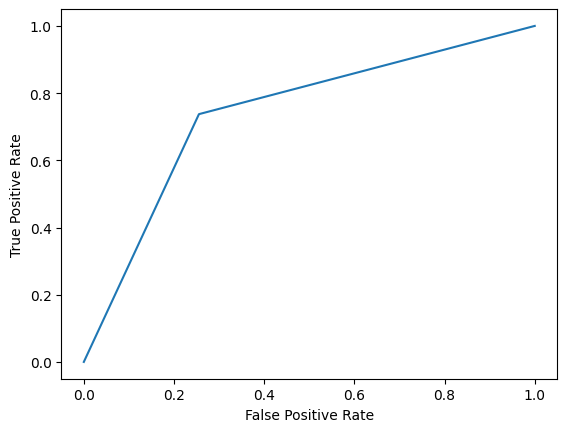

In [40]:
#LOGISTIC AUC ROC CURVE

from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()






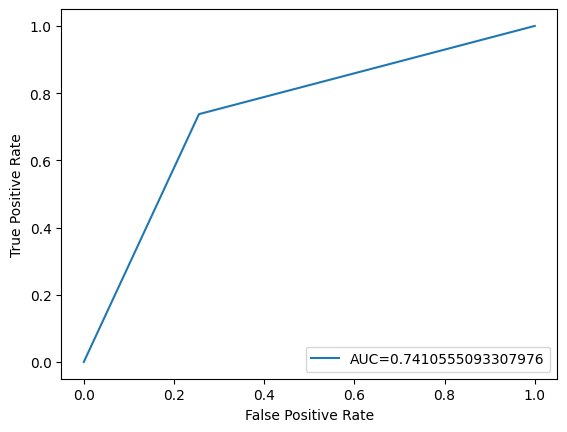

In [41]:
#Calculate the AUC
auc = metrics.roc_auc_score(y_test, y_pred)
auc
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

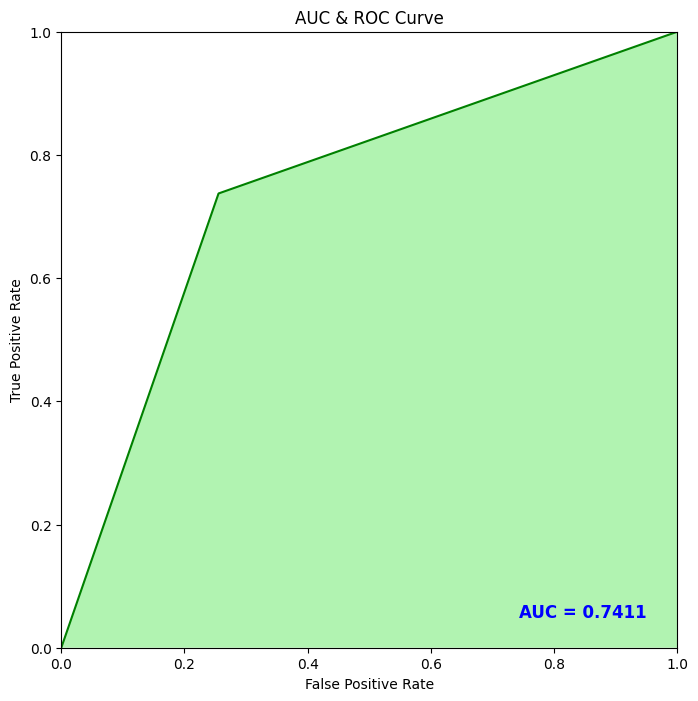

In [42]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

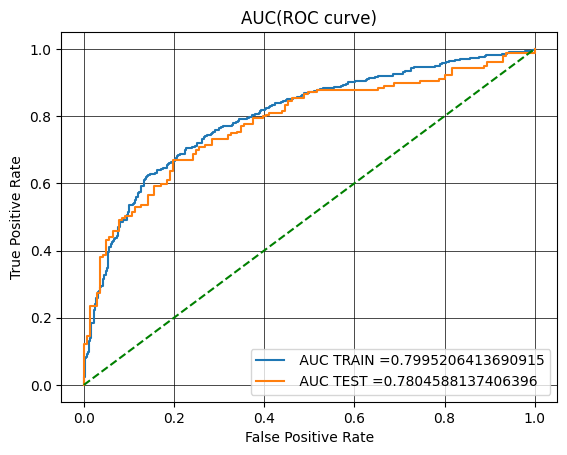

In [45]:
#SVM AUC ROC CURVE

from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
model = SGDClassifier(loss='hinge',class_weight='balanced')
model.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred = model.decision_function(x_train)    
y_test_pred = model.decision_function(x_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

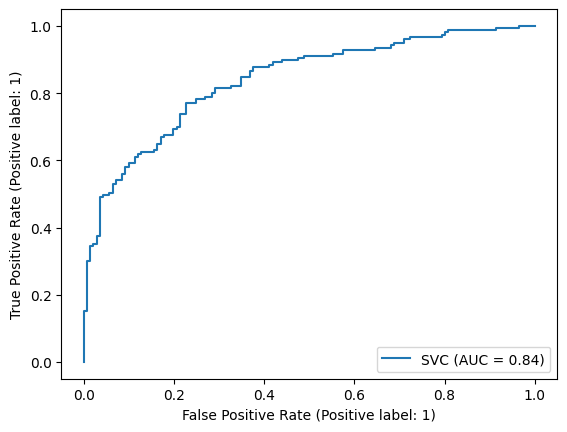

In [46]:
#RANDOM FOREST AUC ROC
from sklearn.metrics import RocCurveDisplay
m1_disp = RocCurveDisplay.from_estimator(m1, x_test, y_test)
plt.show()

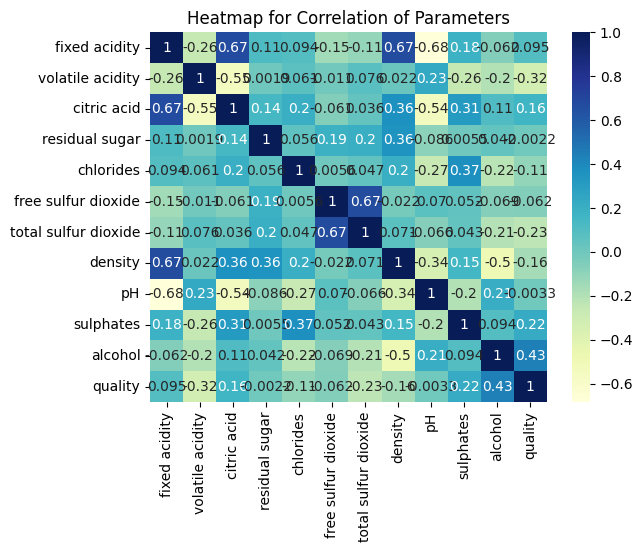

In [48]:
#CONFUSTION METRICS FOR THE CLASSFIFICATIONS

# heatmap

corr =df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.title('Heatmap for Correlation of Parameters')
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler_X_train=scaler.fit_transform(x_train)

scaler_X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [52]:
scaler_X_test=scaler.transform(x_test)

scaler_X_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

In [53]:
svc_clf = SVC(C=1.0, 
              kernel='rbf', 
              degree=3, 
              gamma='auto', 
              coef0=0.0, shrinking=True, 
              probability=False, 
              tol=0.001, cache_size=200, 
              class_weight=None, 
              verbose=False, max_iter=-1, 
              decision_function_shape='ovr', 
              break_ties=False,random_state=None)

svc_clf.fit(scaler_X_train,y_train)

SVC(gamma='auto')

In [54]:
svc_clf_predictions=svc_clf.predict(scaler_X_test)

In [55]:
svc_clf_predictions


array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
c=confusion_matrix(y_test,svc_clf_predictions)
a=accuracy_score(y_test,svc_clf_predictions)
p=precision_score(y_test,svc_clf_predictions)
r=recall_score(y_test,svc_clf_predictions)

In [58]:
print('Confusion Matrix:\n',c)

Confusion Matrix:
 [[109  32]
 [ 41 138]]


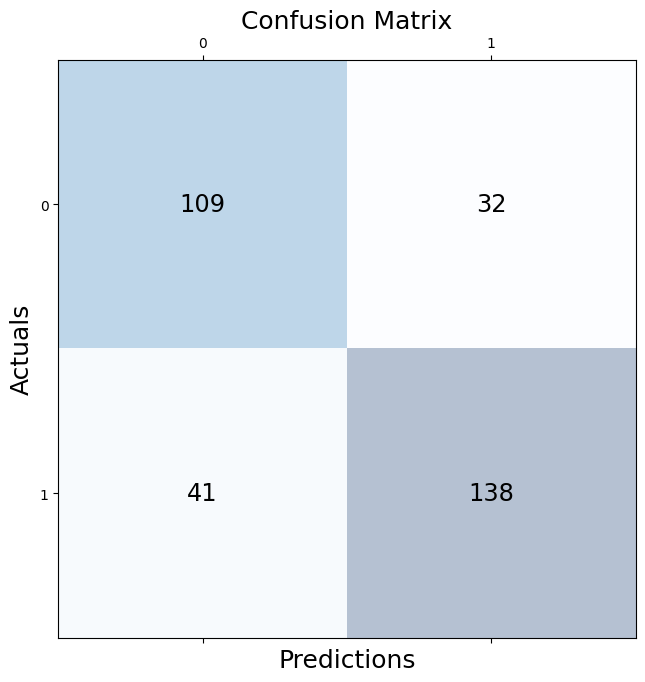

In [59]:
#USING SVM
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

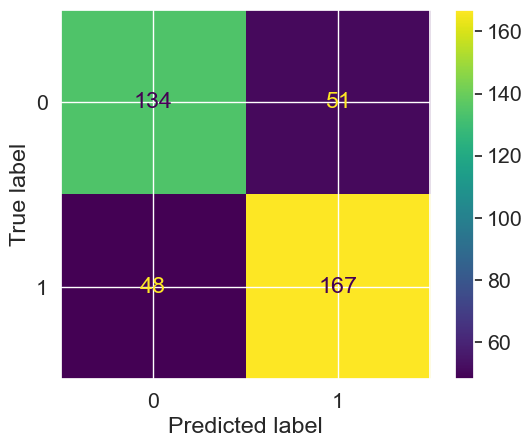

In [62]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

 #Predicting the test set result  
y_pred= classifier.predict(x_test)  

 #Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm
 #accuracy
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)*100

#plot confusion matrix
from sklearn import metrics 
cm_display = metrics.ConfusionMatrixDisplay( cm, display_labels = [0, 1])
import matplotlib.pyplot as plt 
cm_display.plot()

plt.show() 
